# Covid-19 US Counties Dataset
This Coivd-19 dataset is taken from kaggle. It had US Counties Information related to various parameters.

In [2]:
link1_Covid_data = 'https://www.kaggle.com/code/therealcyberlord/coronavirus-covid-19-visualization-prediction'

In [1]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Load data from 'us-counties.csv' file
file_path = 'us-counties.csv'
covid_df = pd.read_csv(file_path)

# Display
print(covid_df.head())

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0


# S&P 500 Data collection from Yahoo Finance
Imports default collection of realtime data on S&P Stocks using this file path.

Link = 'https://finance.yahoo.com/quote/%5Espx/'

In [6]:
import yfinance as yf

# Fetch historical S&P 500 data using yfinance
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [8]:
sp500_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,3743.417502,3765.991467,3719.713526,3744.575663,3744.575663,4.670294e+09
std,608.086740,603.654855,614.720803,609.252037,609.252037,1.209954e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.883780e+09
25%,3280.610107,3288.129883,3253.219971,3276.020020,3276.020020,3.867640e+09
50%,3731.169922,3756.120117,3710.870117,3727.040039,3727.040039,4.375470e+09
75%,4296.399902,4320.660156,4287.040039,4300.459961,4300.459961,5.073020e+09
max,4795.490234,4808.930176,4780.040039,4793.060059,4793.060059,9.976520e+09


# Data Preprocessing

Missing Values of Covid-19 data

In [9]:
# Check for missing values
missing_values = covid_df.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

# Handling missing values
covid_df.dropna(inplace=True)

Missing values in the dataset:
 date          0
county        0
state         0
fips      23678
cases         0
deaths    57605
dtype: int64


In [10]:
# Drop rows with missing 'fips' or 'deaths'
covid_df.dropna(subset=['fips', 'deaths'], inplace=True)

In [11]:
# Overview statistics
overview_stats = covid_df[['cases', 'deaths']].describe()
print("Overview Statistics for Cases and Deaths:\n", overview_stats)

Overview Statistics for Cases and Deaths:
               cases        deaths
count  2.421549e+06  2.421549e+06
mean   9.962527e+03  1.521670e+02
std    4.370867e+04  6.166726e+02
min    1.000000e+00  0.000000e+00
25%    3.880000e+02  6.000000e+00
50%    1.814000e+03  3.300000e+01
75%    6.017000e+03  1.010000e+02
max    2.908425e+06  3.202200e+04


Missing Values of S&P500

In [12]:
# Handling missing values in S&P 500 data
sp500_data.dropna(inplace=True)  # Dropping rows with missing values (NaNs)

# Feature Engineering for S&P 500 data
sp500_data['daily_return'] = sp500_data['Close'].pct_change() * 100  # Percentage change

# Display
print(sp500_data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3237.179932   
2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049  3253.050049   

                Volume  daily_return  
Date                                  
2020-01-02  3459930000           NaN  
2020-01-03  3484700000     -0.705987  
2020-01-06  3702460000      0.353337  
2020-01-07  3435910000     -0.280324  
2020-01-08  3726840000      0.490245  


# Exploratory Data Analysis
Build visualizations for individual datasets.

Visulaizations

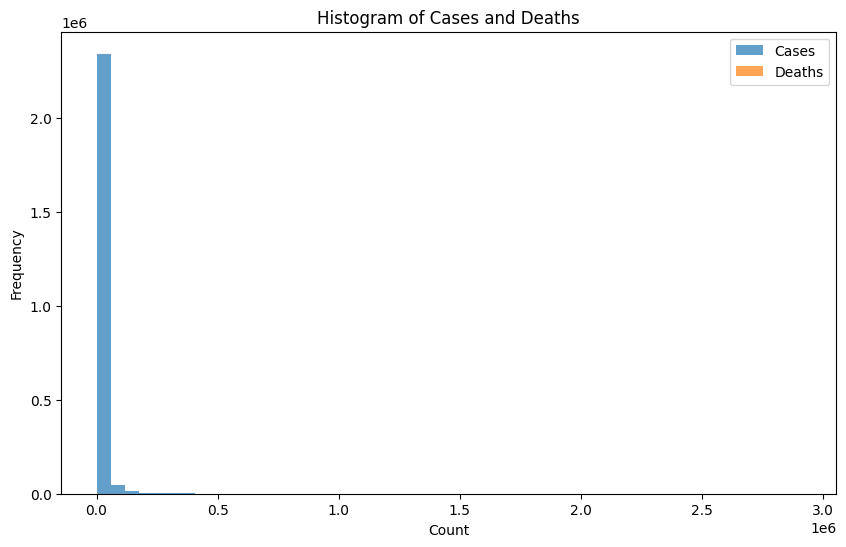

In [13]:
import matplotlib.pyplot as plt

# Histogram of cases and deaths
plt.figure(figsize=(10, 6))
plt.hist(covid_df['cases'], bins=50, alpha=0.7, label='Cases')
plt.hist(covid_df['deaths'], bins=50, alpha=0.7, label='Deaths')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Cases and Deaths')
plt.legend()
plt.show()

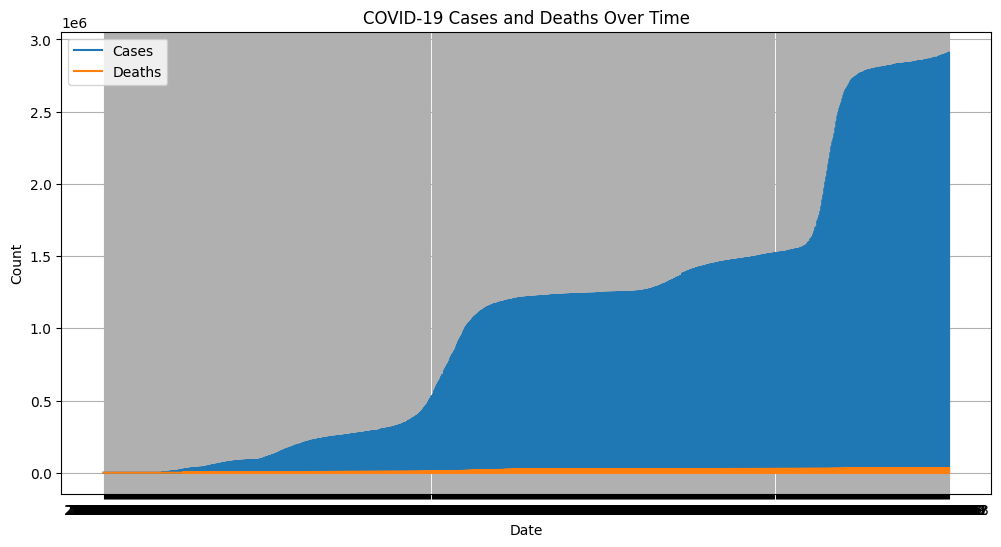

In [ ]:
# Time series plot of cases and deaths
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(covid_df['date'], covid_df['cases'], label='Cases')
plt.plot(covid_df['date'], covid_df['deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

S&p 500 data

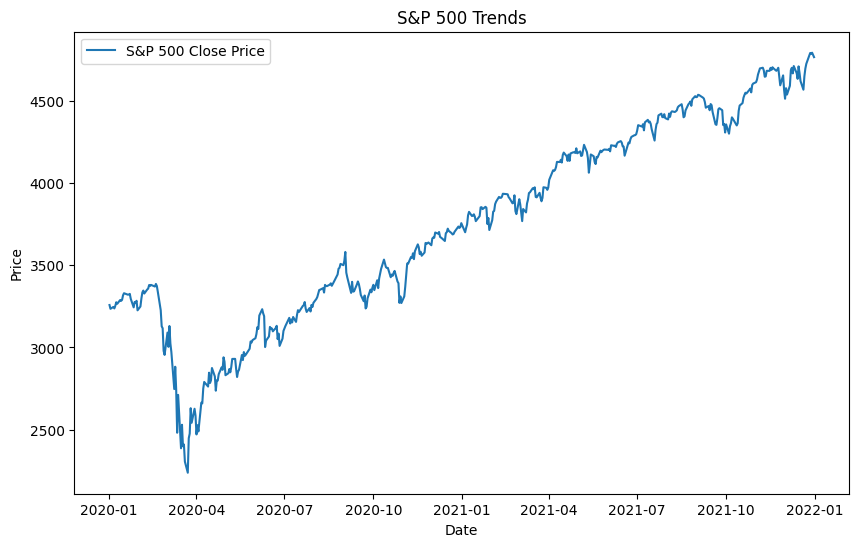

Correlation between S&P 500 Close Price and Daily COVID-19 Cases: nan


In [14]:
# Visualization of S&P 500 trends
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sp500_data.index, sp500_data['Close'], label='S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Trends')
plt.legend()
plt.show()

# Correlation analysis between S&P 500 and COVID-19 metrics
sp500_covid_correlation = sp500_data['Close'].corr(covid_df['cases'])
print("Correlation between S&P 500 Close Price and Daily COVID-19 Cases:", sp500_covid_correlation)

#Feature Selection

S&P500 from yahoo finance

In [15]:
import yfinance as yf

# Fetch historical S&P 500 data
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2021-12-31')  # Adjust date range as needed

# Display summary and the first few rows of the S&P 500 data
print(sp500_data.info())
print(sp500_data.head())

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB
None
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912 

# Merged Data: S&P 500 and Covd-19

- We can convert the 'date' column in the COVID-19 dataframe to the datetime type to match to that of Yahoo finnace data.

In [16]:
# Convert 'date' column in covid_df to datetime type
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Merge COVID-19 and S&P 500 data based on dates
merged_data = pd.merge(covid_df, sp500_data, left_on='date', right_on='Date', how='inner')

# Check for correlations in COVID-19 features and S&P 500 performance
correlation_matrix = merged_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

<ipython-input-16-2ff9ff8ba933>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


Correlation Matrix:
                fips     cases    deaths      Open      High       Low  \
fips       1.000000 -0.051058 -0.055496  0.005052  0.004977  0.005113   
cases     -0.051058  1.000000  0.962133  0.159074  0.159489  0.158748   
deaths    -0.055496  0.962133  1.000000  0.136624  0.136920  0.136390   
Open       0.005052  0.159074  0.136624  1.000000  0.999456  0.999168   
High       0.004977  0.159489  0.136920  0.999456  1.000000  0.999142   
Low        0.005113  0.158748  0.136390  0.999168  0.999142  1.000000   
Close      0.005038  0.159095  0.136636  0.998554  0.999273  0.999430   
Adj Close  0.005038  0.159095  0.136636  0.998554  0.999273  0.999430   
Volume    -0.004294 -0.054583 -0.048776 -0.422918 -0.419673 -0.436519   

              Close  Adj Close    Volume  
fips       0.005038   0.005038 -0.004294  
cases      0.159095   0.159095 -0.054583  
deaths     0.136636   0.136636 -0.048776  
Open       0.998554   0.998554 -0.422918  
High       0.999273   0.999273 -0

This matrix indicates the correlations between different variables in the merged dataset. It shows that the 'cases' and 'deaths' from COVID-19 data have a positive correlation with some of the S&P 500 stock market performance metrics such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

# Machine Learning Model Developemnt

From our 'merged_data' contains the merged dataset of COVID-19 and S&P 500 data.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Define features and target variable
features = ['cases', 'deaths']  # Adjust features as needed
target = 'Close'  # Target variable (S&P 500 Close Price)

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean Cross-validation Score: {cv_scores.mean()}")

Mean Squared Error (MSE): 325249.01678787585
Root Mean Squared Error (RMSE): 570.306072901101
R-squared (R2): 0.028262727874852622
Cross-validation Scores: [-21.19501088 -14.37531202  -0.95092004 -26.20728919 -47.54281431]
Mean Cross-validation Score: -22.054269290068255


These results suggest that the Linear Regression model might not be suitable for predicting the S&P 500 Close Price using the selected features (COVID-19 cases and deaths) as input. But it is an efficent model for real time with large dataset(COVID Global wide data make a better prediction).

# Predictions and Interpretation

Utilize the trained model to predict S&P 500 stock prices based on COVID-19 data.
- Interpretation: Analyze predictions to understand how COVID-19 factors impact stock market movements.

In [18]:
# Predict S&P 500 stock prices using COVID-19 features
X = merged_data[['cases', 'deaths']]  # Select COVID-19 features
predictions = model.predict(X)  # Make predictions

# Display the predictions
print("Predicted S&P 500 stock prices:")
print(predictions)

Predicted S&P 500 stock prices:
[3816.44752949 3816.44752949 3816.44752949 ... 3838.26272181 3820.7566623
 3821.90598164]


# Visualization and Reporting
Create visual representations of predictions, correlations, and trends.

- Summarize insights, correlations, and model performance clearly.
- By utilizing the index of your S&P 500 data on x-axis, we've plotted the actual S&P 500 stock prices against the predicted prices.

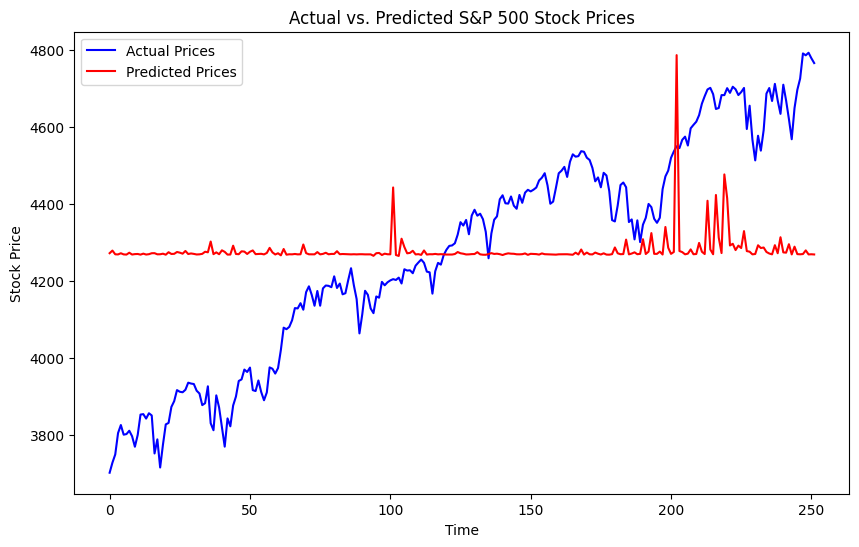

In [ ]:
import matplotlib.pyplot as plt

# Set 'actual_stock_prices' and 'predicted_stock_prices'
plt.figure(figsize=(10, 6))
plt.plot(sp500_data.index, sp500_data['Close'], label='Actual Prices', color='blue')
plt.plot(predictions[:len(sp500_data)], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted S&P 500 Stock Prices')
plt.legend()
plt.show()

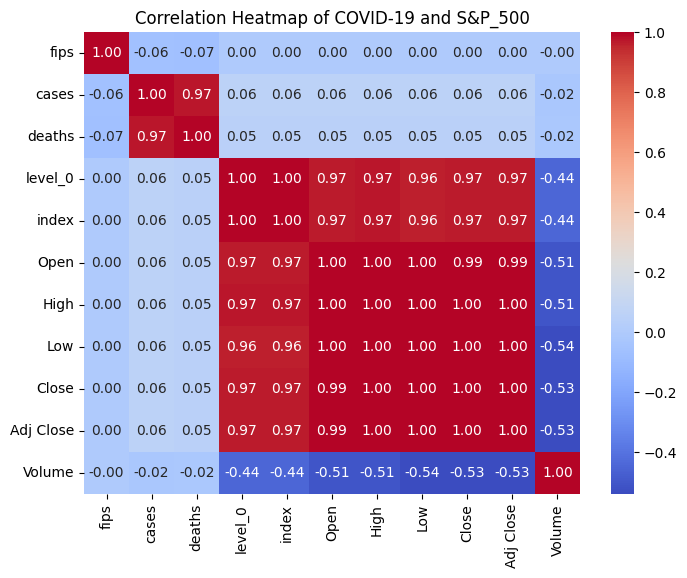

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of COVID-19 and S&P_500')
plt.show()

In [19]:
# Import libraries
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from numpy import mean

# Finding Mean Squared Error (MSE)
print(f"Mean Squared Error (MSE): {mse}")

# Finding Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Finding R-squared(R2)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared}")

# Mean Cross-validation Score
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Mean Cross-validation Score: {cross_val_scores}")

# Mean Cross-validation Score
mean_cross_val_score = mean(cross_val_scores)
print(f"Mean Cross-validation Score: {mean_cross_val_score}")

Mean Squared Error (MSE): 325249.01678787585
Root Mean Squared Error (RMSE): 570.306072901101
R-squared (R2): 0.028262727874852622
Mean Cross-validation Score: [-21.19501088 -14.37531202  -0.95092004 -26.20728919 -47.54281431]
Mean Cross-validation Score: -22.054269290068255


# Iteration and Improvement:
- Refine the model, feature selection, or data preprocessing based on insights gained during analysis.Using Linear Regression approach as it suitable for predicting continuous values (like stock prices such as the S&P 500 Close Price).


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
features = ['cases', 'deaths']  # Features
target = 'Close'  # Target variable

# Training data X_train, y_train
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 325249.01678787585
R-squared Score: 0.028262727874852622
